#**Water Potability Analysis By Sameed**
### What to expect in this notebook

*   Introduction
*   Essential Libraries
*   Data Preprocessing
  *   Handling Missing Values
  *   Handling Outliers
  *   Correlation
*   Data Modeling
  *   Train Test Split
  *   Machine Learning (Random Forest, Gradient Boosting, SVC)
  *   Model Evaluation
*   Hyperparameter Tunning
*   Model Save
*   API Creation



## **Introduction**

*   List itemWater quality is of vital importance to human health. Having accessible and safe drinking water is a fundamental requirement for maintaining a healthy life. Ensuring the availability of clean drinking water is a crucial step in preventing diseases and a critical component in improving the overall health of a community.

*   Water quality not only impacts individual health but also plays a crucial role in societal and economic development. Issues such as environmental pollution and depletion of water sources pose a threat to the sustainability of sectors like agriculture, industry, and tourism. This, in turn, can have adverse effects on economic growth and reduce the overall quality of life.

*   Preserving and improving water quality is a priority not only at the local level but also on a national and international scale. Sustainable management of water resources, along with measures like water treatment and distribution of purified water, plays a key role in maintaining and enhancing water quality. In this context, data analysis and scientific research related to water quality can provide policymakers with essential insights, helping them formulate effective strategies for water resource management and preservation of water quality.



## Libraries

In [3]:
#Essential Libraries for performing analysis
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import get_cmap
import numpy as np
import seaborn as sns

#Machine Learing Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance

#Library to Save & Load Model
import joblib

## Data Preprocessing

In [4]:
df = pd.read_csv("D:\\Code\\Water Potability\\Water-Potability\\water_potability.csv")

In [5]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df.shape

(3276, 10)

Our original dataset has 3276 rows and 10 columns, now its time to spot the missing values and outliers.

### Handling Missing Values

In [7]:
# Number of missing values in each column
for col in df.columns:
  print(col,"->",df[col].isna().sum())


ph -> 491
Hardness -> 0
Solids -> 0
Chloramines -> 0
Sulfate -> 781
Conductivity -> 0
Organic_carbon -> 0
Trihalomethanes -> 162
Turbidity -> 0
Potability -> 0


ph, Sulfate, and Trihalomethanes has missing values. We will replace the ph, Sulfate and Trihalomethanes missing values with their mean.

In [8]:
# Replacing ph missing values with their mean
mean_value_1 =df['ph'].mean()
df['ph'].fillna(value=mean_value_1, inplace=True)

In [9]:
# Replacing Trihalomethanes missing values with their mean
mean_value_1 =df['Trihalomethanes'].mean()
df['Trihalomethanes'].fillna(value=mean_value_1, inplace=True)

In [10]:
# Replacing Sulfate missing values with their mean
mean_value_2 =df['Sulfate'].mean()
df['Sulfate'].fillna(value=mean_value_2, inplace=True)

In [11]:
print(df.shape)
for col in df.columns:
  print(col,"->",df[col].isna().sum())

(3276, 10)
ph -> 0
Hardness -> 0
Solids -> 0
Chloramines -> 0
Sulfate -> 0
Conductivity -> 0
Organic_carbon -> 0
Trihalomethanes -> 0
Turbidity -> 0
Potability -> 0


All missing values are fixed.

In [12]:
# Summary of the dataframe
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Pretty much all columns seem to have outliers, lets visualize them better with a box plot.

### Identifying Outliers

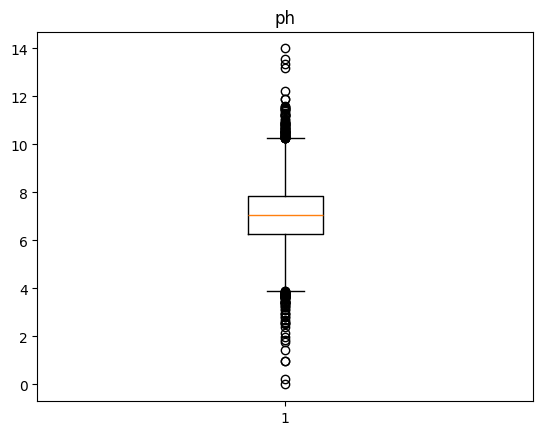

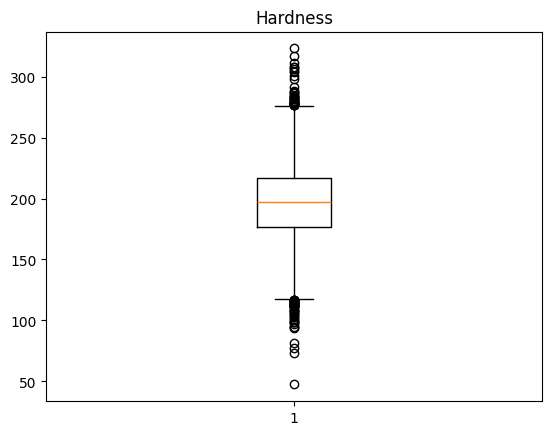

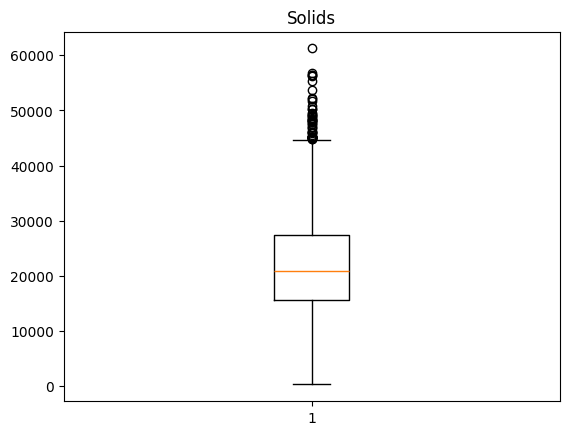

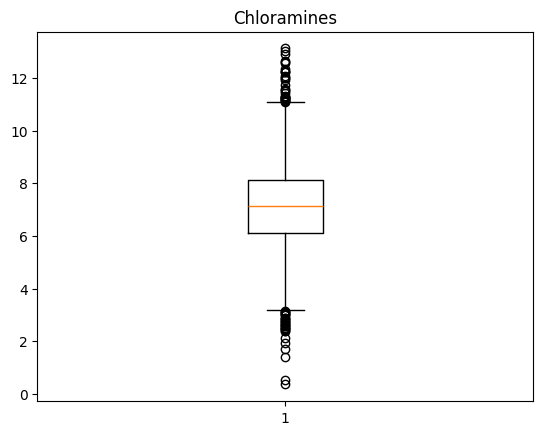

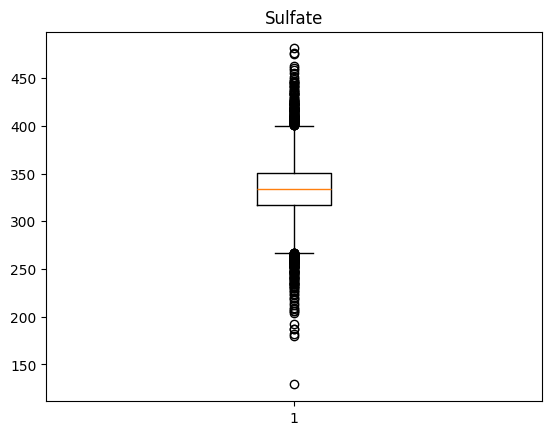

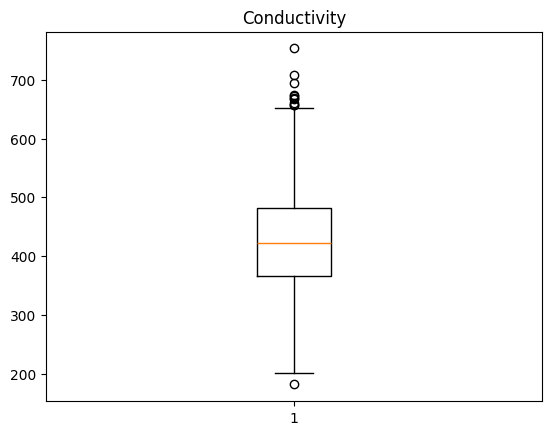

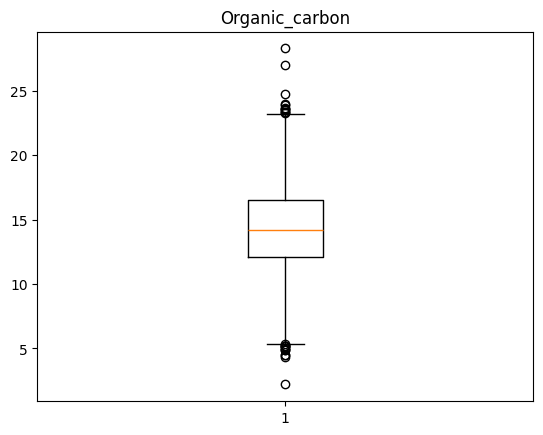

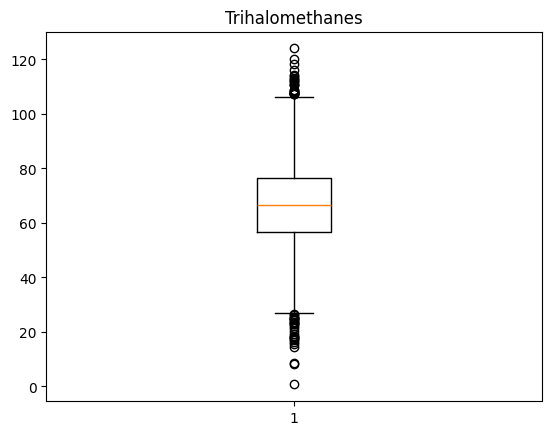

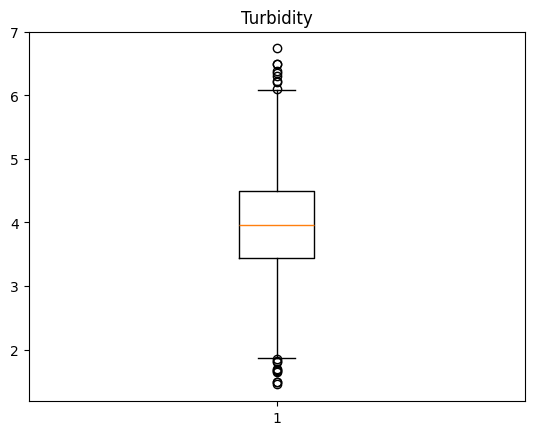

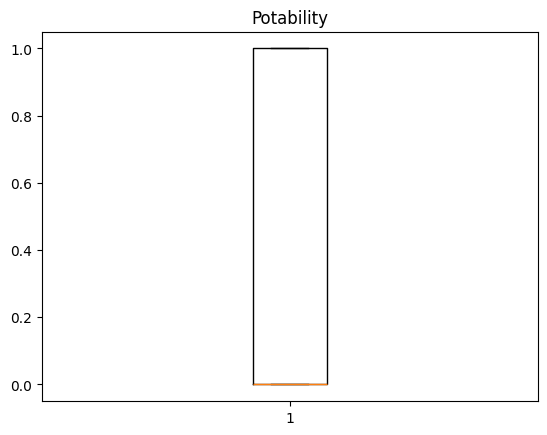

In [13]:
# Boxplot to visualize the 5-number summary and spot outliers
for col in df.columns:
  plt.boxplot(df[col])
  plt.title(col)
  plt.show()


All variables have outliers, now lets see the exact count so we can treat them.

### Removing Outliers

In [14]:
#Checking outliers in each column that exceed the 1.5 threshold
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


ph                 142
Hardness            83
Solids              47
Chloramines         61
Sulfate            264
Conductivity        11
Organic_carbon      25
Trihalomethanes     54
Turbidity           19
Potability           0
dtype: int64

Since the count of outliers is not a lot, we can remove them. Although, we can also replace them with their mean values.

In [15]:
#Dropping outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


The data is finally cleaned, and now we have 2323 rows. Let's see how the features are distributed.

### Data Analysis

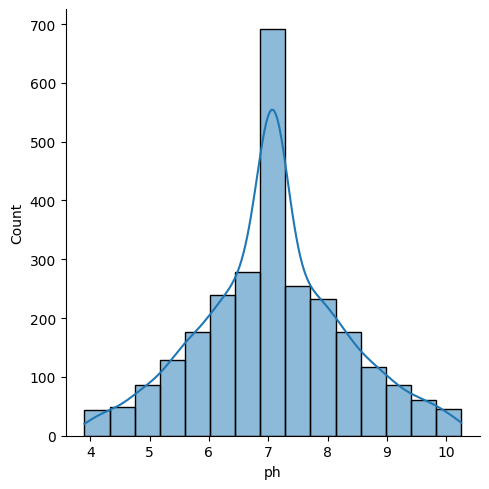

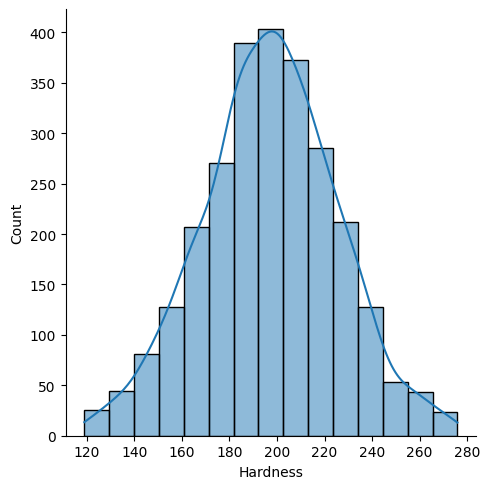

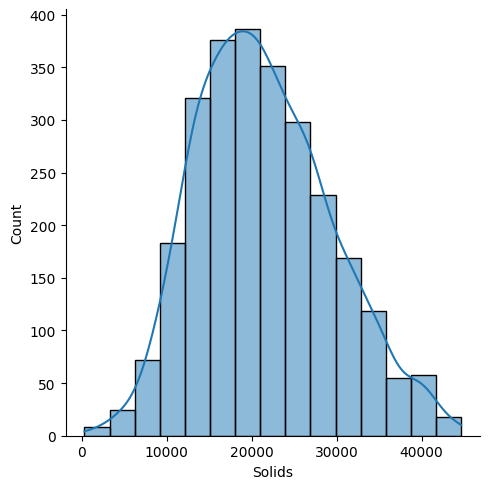

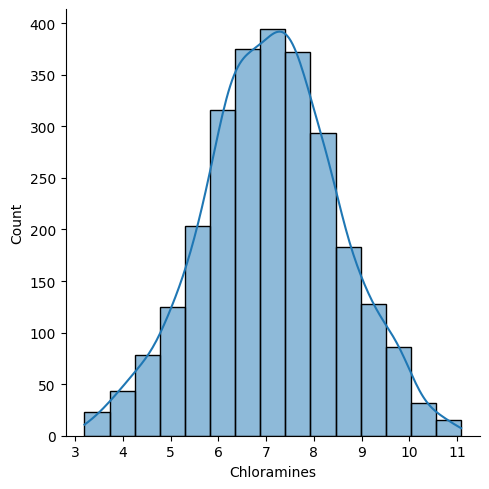

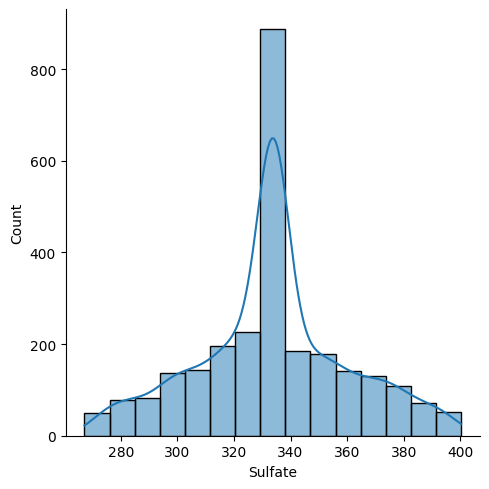

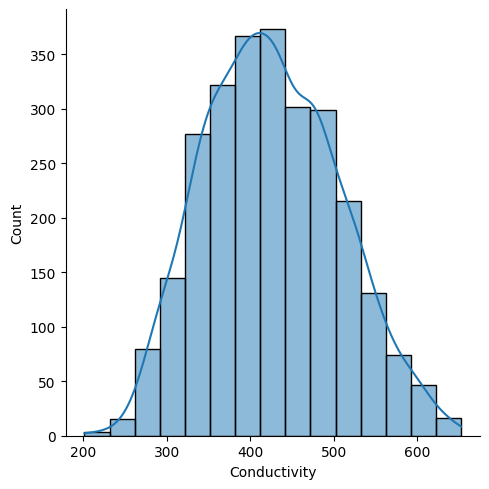

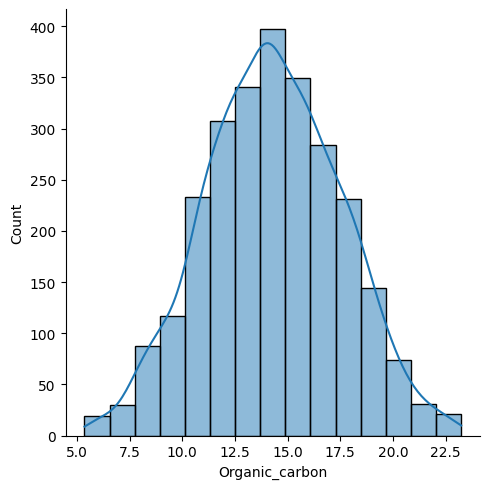

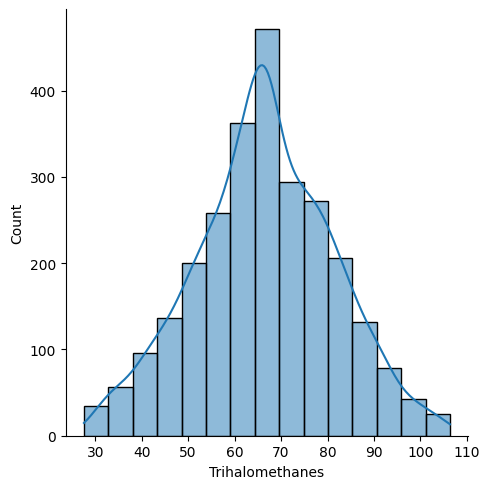

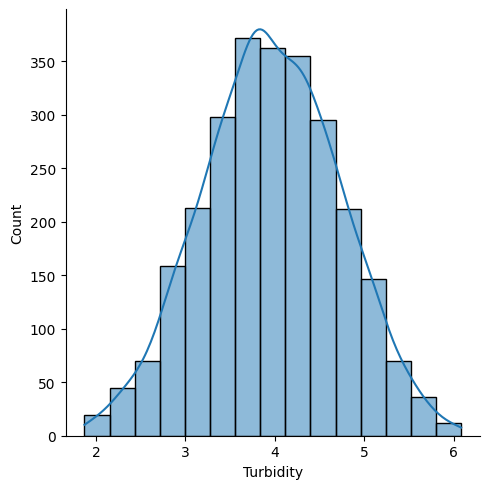

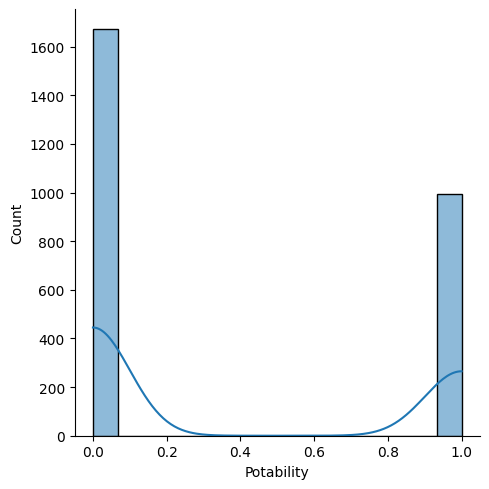

In [16]:
#To check distrubution of the features
for col in df.columns:
  sns.displot(df[col], kde=True, bins=15)

All the features seem to be normally distributed (bell-curved), this seems intentional, going over the correlation will further unravel their properties.

Checking Correlation

<Axes: >

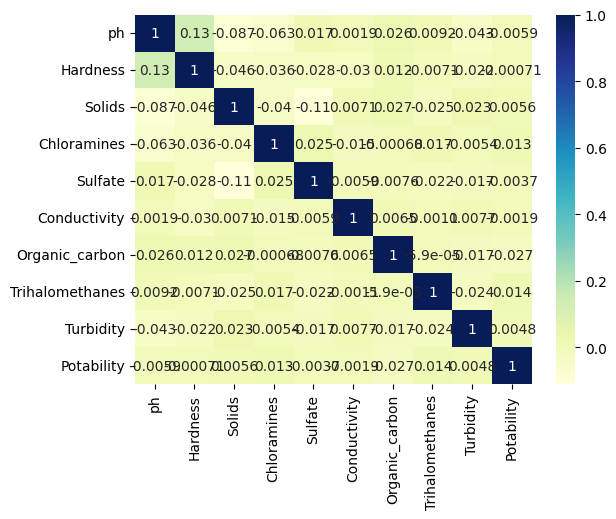

In [17]:
#To check the correlation between features
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


The correlation heatmap shows there is no linear relationship between the features, this means a linear model will not work. We will have to train our data on a non-linear model.

In [18]:
#For correlation matrix w.r.t the target variable
for col in df:
  x = np.corrcoef(df[col],df['Potability'])
  print(x)

[[ 1.        -0.0059491]
 [-0.0059491  1.       ]]
[[ 1.00000000e+00 -7.09777814e-04]
 [-7.09777814e-04  1.00000000e+00]]
[[1.         0.00560044]
 [0.00560044 1.        ]]
[[1.         0.01319464]
 [0.01319464 1.        ]]
[[ 1.         -0.00374073]
 [-0.00374073  1.        ]]
[[ 1.         -0.00188595]
 [-0.00188595  1.        ]]
[[ 1.         -0.02709014]
 [-0.02709014  1.        ]]
[[1.         0.01435115]
 [0.01435115 1.        ]]
[[1.         0.00476128]
 [0.00476128 1.        ]]
[[1. 1.]
 [1. 1.]]


### Spliting and Transforming Data

In [19]:
#Splitting the dataset and scaling it to improve the performance
x=df.drop(['Potability'], axis=1)
y=df['Potability']
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

I am using three non-linear models for our data, Random Forest, Gradient Boosting, and SVC. I have used accuracy_score as the evaluation metric because it is generally considered a simple metric. It is not biased towards any class. I also calculated the F1 scores of each of these models and they yielded the same results.

### Applying models for prediction of potability of water

RandomForestClassifier() : {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
GradientBoostingClassifier() : {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
SVC() : {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_fun

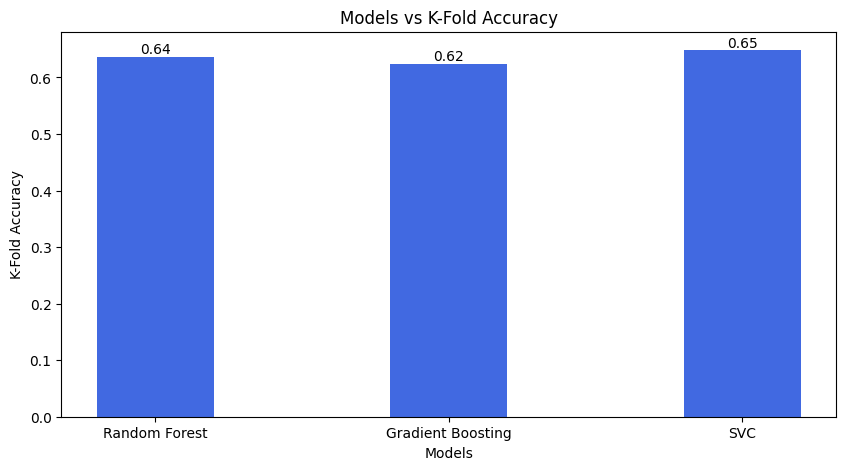

In [20]:
# Trying three models for their K-fold cross-validation accuracy
models = [RandomForestClassifier(), GradientBoostingClassifier(), SVC()]
cv_accuracy = []

for model in models:
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_accuracy.append(scores.mean())
    print(model,":",model.get_params())

# Plotting their K-fold cross-validation accuracy to visualize the best performing model
models = ["Random Forest", "Gradient Boosting", "SVC"]
fig = plt.figure(figsize=(10, 5))
plt.bar(models, cv_accuracy, color='royalblue', width=0.4)
# Define the addlabels function to add labels on top of each bar
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], f'{y[i]:.2f}', ha='center', va='bottom')
addlabels(models, cv_accuracy)
plt.xlabel("Models")
plt.ylabel("K-Fold Accuracy")
plt.title("Models vs K-Fold Accuracy")
plt.show()

It turns out SVC is the best performing model among the three, so we will optimize its hyperparameters.

### Tunning Hyperparameters to achieve higher accuracy

In [22]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'C': [0.001,0.1,1, 10, 100,1000],  
    'gamma':  [1,0.1,0.01,0.001,0.0001],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    SVC(), param_distributions=param_dist, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1
)

# Fit the RandomizedSearchCV object to your data
random_search.fit(X_train, y_train)

# Print the best estimator and its corresponding parameters
print("Best Estimator:", random_search.best_estimator_)
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Estimator: SVC(C=1, gamma=0.1)
Best Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}


In [ ]:
random_search_predictions = random_search.predict(X_test)
print(confusion_matrix(y_test,random_search_predictions))
print(classification_report(y_test,random_search_predictions))

[[342  15]
		 [178  46]]
		              precision    recall  f1-score   support

		           0       0.66      0.96      0.78       357
		           1       0.75      0.21      0.32       224

		    accuracy                           0.67       581
		   macro avg       0.71      0.58      0.55       581
		weighted avg       0.69      0.67      0.60       581

The classification report shows our model is 67% accurate, not good, but not the worst either.

In [21]:
#Figuring out the feature importance
perm_importance = permutation_importance(model, X_test, y_test)

feature_names = df.columns
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

It turns out ph is the most important feature in our dataset, with Sulfate and Solids following it behind. Trihalomethanes are the least important features.

In [ ]:
#Exporting the trained model as a pickle file for API integration
joblib.dump(model, 'model.pkl')

Now that my model is trained and ready to be used, I will create it as a pickle package to be used in FastAPI.